## Pair Visualización

Ejercicios visualización

En este pair programming usaremos el csv que generamos en el pair programming de ayer, el de la gestión de nulos. A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

1-  ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

2-  ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

3-  ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

4-  ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

5-  ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

6-  ¿Cuáles son los 10 países con la mayor área forestal?

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

*   Todas deben llevar título.

*   Los nombres de los ejes deben estar en castellano.

*   En los scatterplot los puntos deben tener un tamaño de 2.

*   En los scatterplot los puntos deben tener un color diferente al azul.

*   En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

*   En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

*   En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


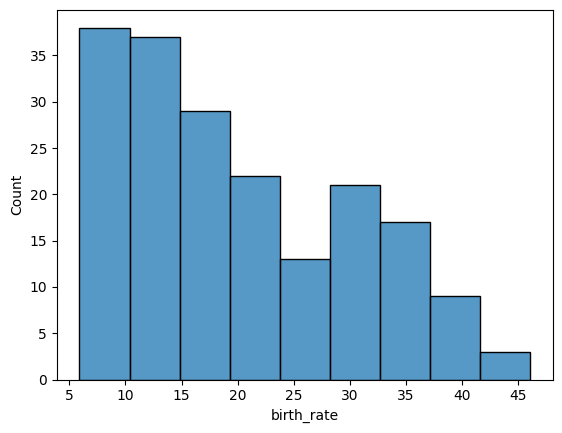

In [3]:
# 1.  ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?
sns.histplot(x = "birth_rate", data = df);

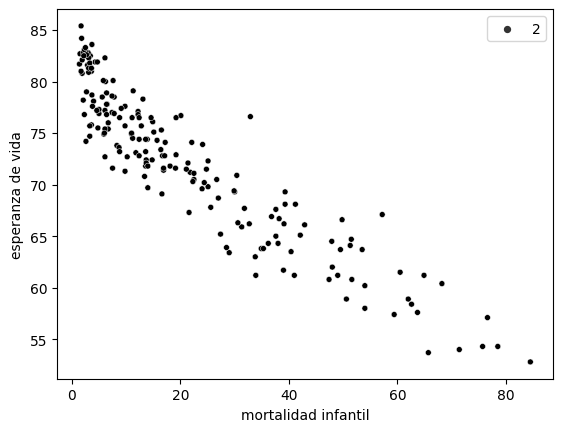

In [4]:
# 2.  ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.
sns.scatterplot(x = 'infant_mortality', 
                y = "life_expectancy", 
                size = 2, 
                color = "black",
                data = df )
plt.ylabel("esperanza de vida")
plt.xlabel("mortalidad infantil");

In [5]:
# 3.  ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
df_pais_continente = df.groupby("continent")["country"].count().reset_index()
df_pais_continente.rename(columns = {"country": "%"}, inplace = True)
df_pais_continente["%"] = np.round(df_pais_continente["%"] * 100 / df_pais_continente["%"].sum(), 2)
df_pais_continente.sort_values(by = "%", ascending = False, inplace=True)
df_pais_continente

,continent,%
0,Africa,27.32
3,Europe,24.23
1,Asia,23.20
2,Central America,10.31
5,Oceania,7.22
6,South America,6.70
4,North America,1.03


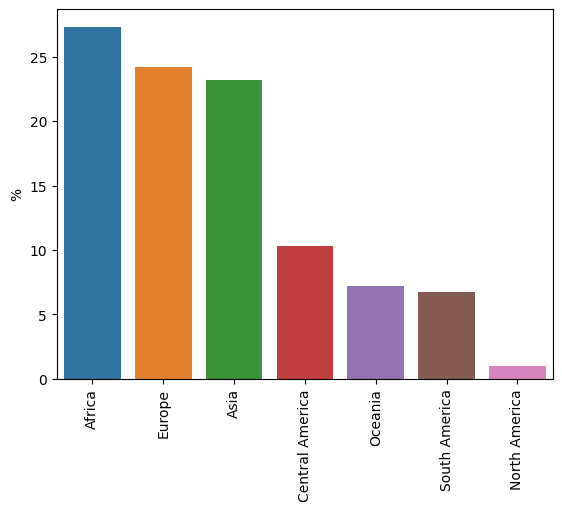

In [6]:
# grafica 1
sns.barplot(x = "continent", y = "%", data = df_pais_continente)
plt.xticks(rotation = 90)
plt.xlabel("");

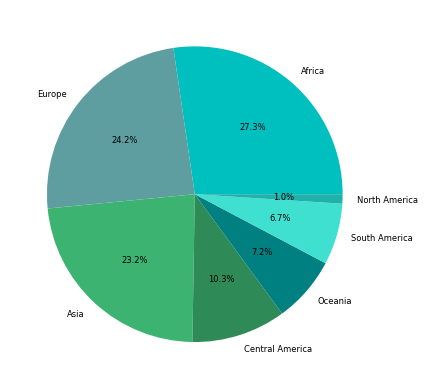

In [7]:
# grafica 2
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie(df_pais_continente["%"], 
        labels = df_pais_continente["continent"], 
        autopct=  '%1.1f%%', 
        textprops={'fontsize': 6}, 
        colors= colores);

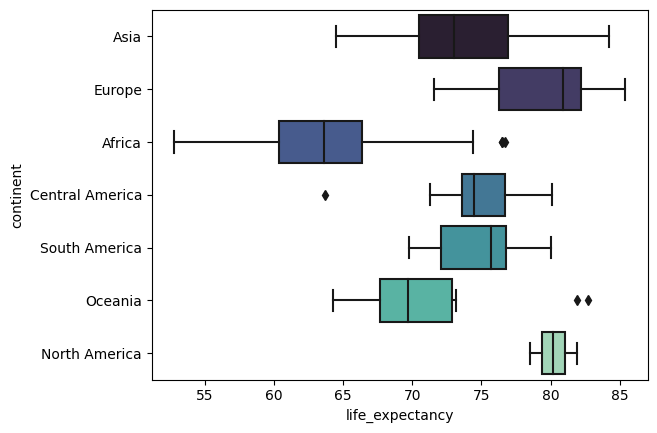

In [8]:
# 4.  ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.
sns.boxplot(x = 'life_expectancy',
            y = "continent",
            palette = "mako",  
            data = df);

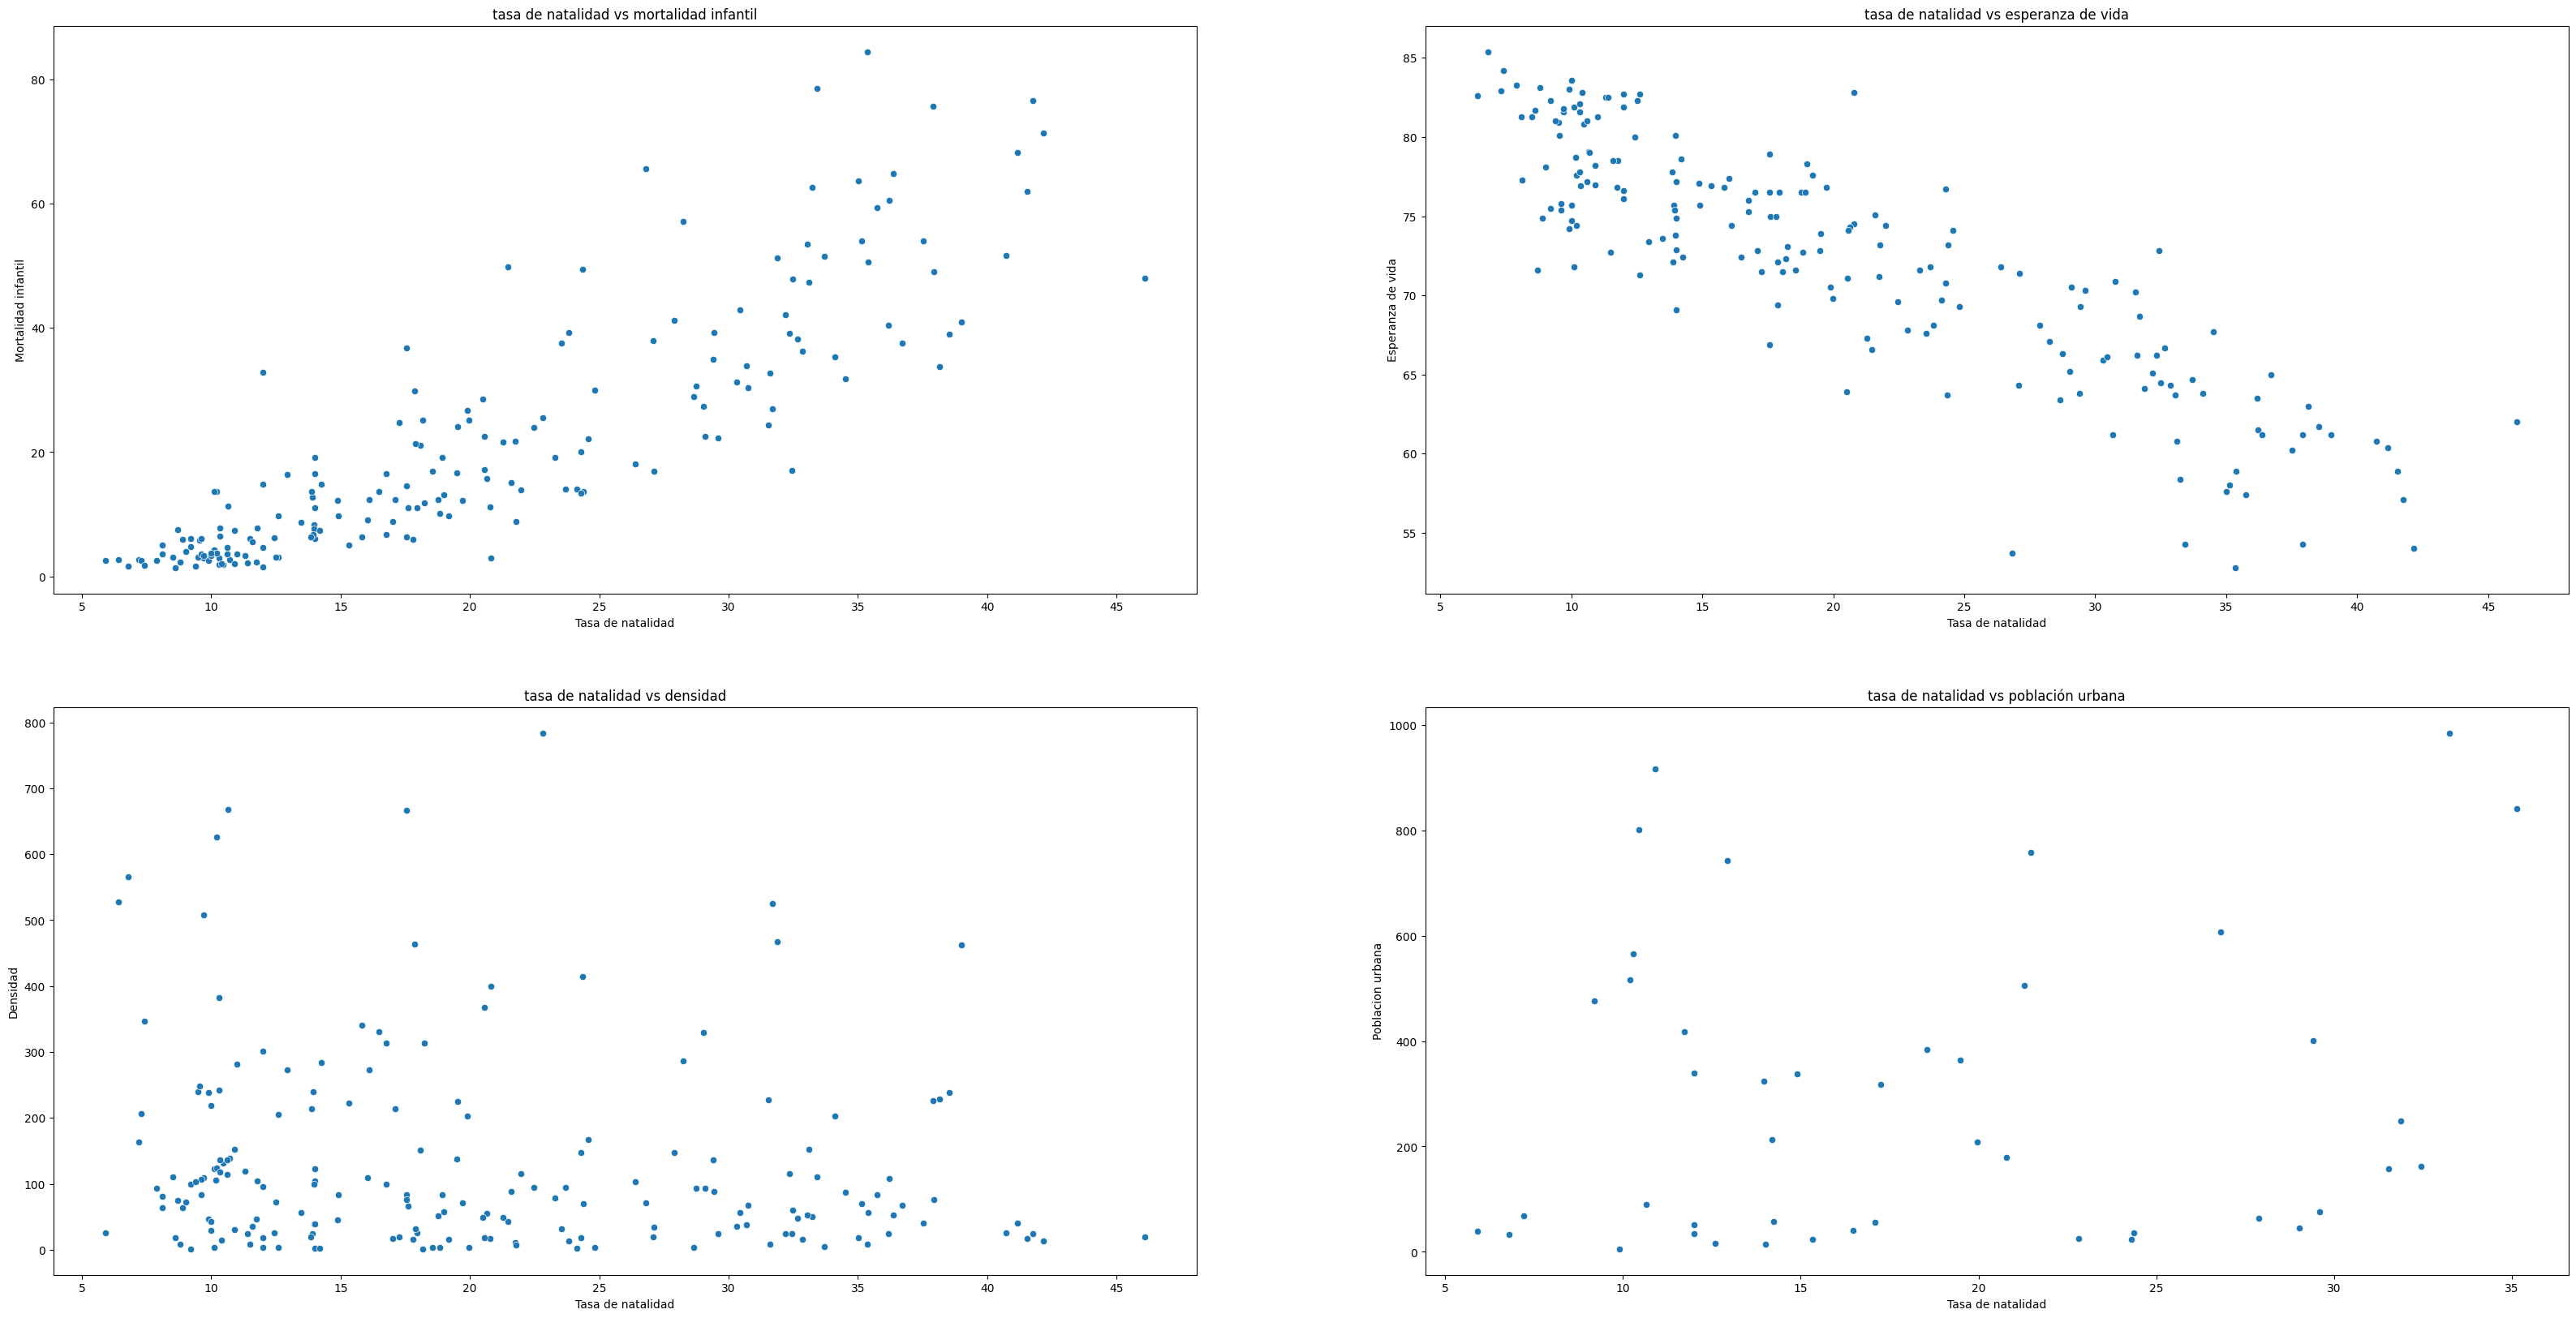

In [9]:
# 5.  ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, tasa de impuestos total, densidad de población y tasa de alfabetización?
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))

sns.scatterplot(x = "birth_rate", y = 'infant_mortality', data = df, ax = axes[0][0])
sns.scatterplot(x = "birth_rate", y = 'life_expectancy', data = df, ax = axes[0][1])
sns.scatterplot(x = "birth_rate", y = 'density', data = df, ax = axes[1][0])
sns.scatterplot(x = "birth_rate", y = 'urban_population', data = df, ax = axes[1][1])

# ponemos titulos a las gráficas
axes[0][0].set_title("tasa de natalidad vs mortalidad infantil")
axes[0][1].set_title("tasa de natalidad vs esperanza de vida")
axes[1][0].set_title("tasa de natalidad vs densidad")
axes[1][1].set_title("tasa de natalidad vs población urbana")


# cambiamos nombres de los ejes
axes[0][0].set_xlabel("Tasa de natalidad")
axes[0][1].set_xlabel("Tasa de natalidad")
axes[1][0].set_xlabel("Tasa de natalidad")
axes[1][1].set_xlabel("Tasa de natalidad")

axes[0][0].set_ylabel("Mortalidad infantil")
axes[0][1].set_ylabel("Esperanza de vida")
axes[1][0].set_ylabel("Densidad")
axes[1][1].set_ylabel("Poblacion urbana");

In [11]:
# 6.  ¿Cuáles son los 10 países con la mayor área forestal?
df_top_10_forestal = df.sort_values(by = "forested_area", ascending = False)[["country", "forested_area"]].head()
df_top_10_forestal

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6


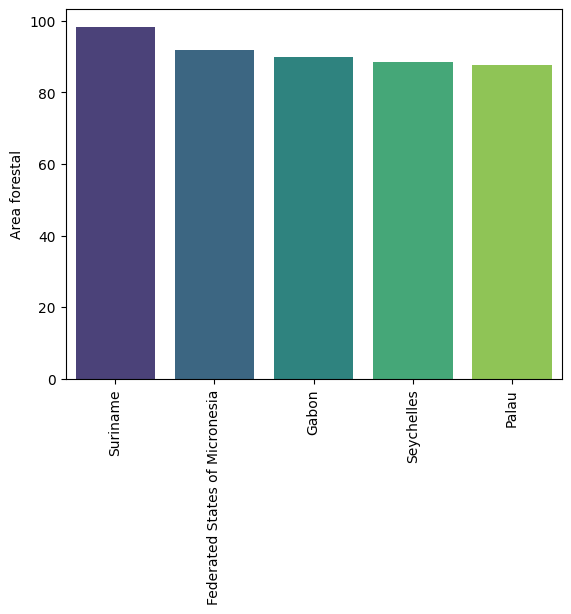

In [12]:
sns.barplot(x = "country", y = "forested_area", data = df_top_10_forestal, palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Area forestal");